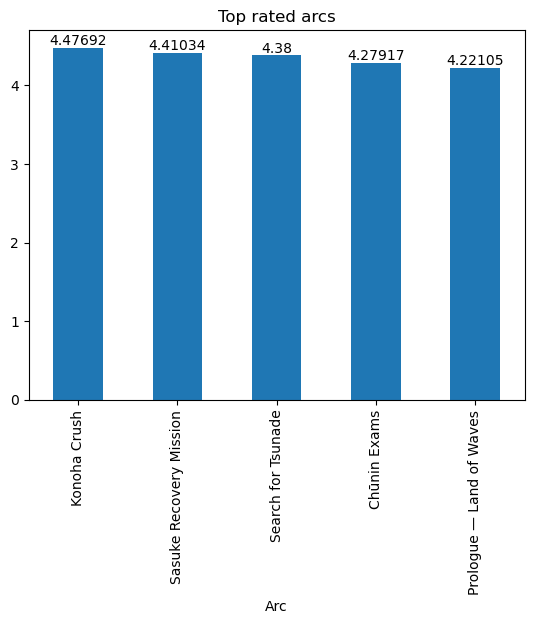

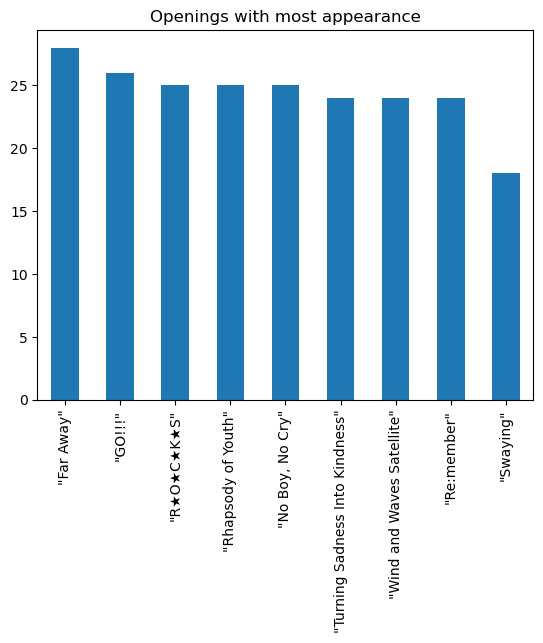

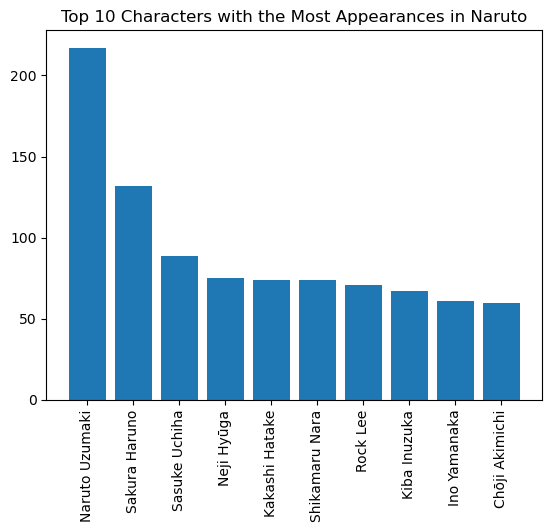

In [71]:
import pandas as pd
import matplotlib.pyplot as plt 

pd.set_option('max_colwidth', None)
df = pd.read_csv('naruto_website_scraper.csv')
df
#some data cleaning and data set exploration
df.rename(columns={'Unnamed: 0': 'Episode Num'}, inplace=True)
df['Episode Num'] = df['Episode Num'].apply(lambda x: x+1)

#converting dates to more useful format
from datetime import datetime
df['Japanese Airdate'] = df['Japanese Airdate'].apply(lambda x: datetime.strptime(x, '%d %B %Y'))
df['English Airdate'] = df['English Airdate'].apply(lambda x: datetime.strptime(x, '%d %B %Y'))

#after importing from csv our char lists are treated as string, so we need to do this:
from ast import literal_eval
df['Char List'] = df['Char List'].apply(lambda x: literal_eval(x))

#looking for arcs with highest avg rating
ax = df.groupby('Arc').Rating.mean().sort_values(ascending=False).head(5).plot(kind='bar', title='Top rated arcs')
for container in ax.containers:
    ax.bar_label(container)
fig = ax.get_figure()
plt.show(block=False)
plt.close(fig)

#counting in how many episodes each opening/ending appeared
#df.Opening.value_counts(normalize=True) if we wanna get percentage
ax = df.Opening[df.Opening != 'None'].value_counts().plot(kind='bar', title='Openings with most appearance')
fig = ax.get_figure()
plt.show(block=False)
plt.close(fig)
#how many episodes were aired each year?
df.groupby(df['Japanese Airdate'].dt.year)['Episode Num'].count()

#we want to count in how many episodes each char appeared throughout the whole tv show
#creating a dict to count and store how many times each char appeared in tv show
char_appear_dict = {}
for ep in df['Char List']:
    for char in list(ep):
        if char in list(char_appear_dict):
            char_appear_dict[char]+=1
        else:
            char_appear_dict[char]=1
#converting list into df, sorting and ploting info
df2 = pd.DataFrame(list(char_appear_dict.items()))
df2.columns = ['Name', 'Number of Episodes']

df2.sort_values('Number of Episodes', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
df2.reset_index(inplace=True, drop=True)

df2_top10 = df2.head(10)

plt.bar(df2_top10['Name'], df2_top10['Number of Episodes'])
plt.xticks(rotation=90)
plt.title('Top 10 Characters with the Most Appearances in Naruto')
plt.show()
plt.close()